In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict
from itertools import cycle

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

In [5]:
matplotlib.rcParams['figure.dpi'] = 125

### Cause of loss
• For each county, retrieving relative percentages of top five causes of loss, from 1989-2018  
• Creating five columns to input as features into multiple regression

In [6]:
def get_top_causes(county, loss_county_year, loss_state_top):
    loss_county_year_dict = loss_county_year.to_dict()
    loss_county_year_dict_top = {}
    for key in loss_county_year_dict:
        year, cause = key[0], key[1]
        if cause in loss_state_top:
            loss_county_year_dict_top[key] = loss_county_year_dict[key]
            
    mapping = defaultdict(dict)
    for key in loss_county_year_dict_top:
        mapping[key[0]][key[1]] = loss_county_year_dict_top[key]
        
    for key in mapping: # key is a year
        value = mapping[key] # type dict
        for cause in loss_state_top:
            if cause not in value:
                value[cause] = 0
    
    df_mapping = pd.DataFrame(mapping).T
    df_mapping['County Name'] = county
    df_mapping = df_mapping.reset_index()
    df_mapping.rename(columns={'index':'Year'}, inplace=True)
    return df_mapping

#### Kansas

In [7]:
loss_Grant = pd.read_csv('Data_KS_WA/KS/KS_Cause_of_Loss/KS_Grant_Cause_of_Loss.csv')
loss_Gray = pd.read_csv('Data_KS_WA/KS/KS_Cause_of_Loss/KS_Gray_Cause_of_Loss.csv')
loss_Haskell = pd.read_csv('Data_KS_WA/KS/KS_Cause_of_Loss/KS_Haskell_Cause_of_Loss.csv')
loss_Kearny = pd.read_csv('Data_KS_WA/KS/KS_Cause_of_Loss/KS_Kearny_Cause_of_Loss.csv')
loss_Morton = pd.read_csv('Data_KS_WA/KS/KS_Cause_of_Loss/KS_Morton_Cause_of_Loss.csv') 

In [8]:
loss_KS = pd.concat([loss_Grant, loss_Gray, loss_Haskell, loss_Kearny, loss_Morton])[['County name', 'Year', 'Cause of loss']]
loss_KS_overall = loss_KS['Cause of loss'].value_counts().head(3)
loss_KS_top = list(loss_KS_overall.to_dict().keys())
print(loss_KS_top)

['Drought', 'Freeze', 'Hail']


In [9]:
loss_Grant_year = loss_Grant['Cause of loss'].groupby(loss_Grant['Year']).value_counts(normalize=True)
loss_Gray_year = loss_Gray['Cause of loss'].groupby(loss_Gray['Year']).value_counts(normalize=True)
loss_Haskell_year = loss_Haskell['Cause of loss'].groupby(loss_Haskell['Year']).value_counts(normalize=True)
loss_Kearny_year = loss_Kearny['Cause of loss'].groupby(loss_Kearny['Year']).value_counts(normalize=True)
loss_Morton_year = loss_Morton['Cause of loss'].groupby(loss_Morton['Year']).value_counts(normalize=True)

causes_feat_Grant = get_top_causes('Grant', loss_Grant_year, loss_KS_top)
causes_feat_Gray = get_top_causes('Gray', loss_Gray_year, loss_KS_top)
causes_feat_Haskell = get_top_causes('Haskell', loss_Haskell_year, loss_KS_top)
causes_feat_Kearny = get_top_causes('Kearny', loss_Kearny_year, loss_KS_top)
causes_feat_Morton = get_top_causes('Morton', loss_Morton_year, loss_KS_top)

causes_feat_KS = pd.concat([causes_feat_Grant, causes_feat_Gray, causes_feat_Haskell, causes_feat_Kearny, causes_feat_Morton])

#### Washington

In [10]:
loss_Lincoln = pd.read_csv('Data_KS_WA/WA/WA_Cause_of_Loss/WA_Lincoln_Cause_of_Loss.csv')
loss_Okanogan = pd.read_csv('Data_KS_WA/WA/WA_Cause_of_Loss/WA_Okanogan_Cause_of_Loss.csv')
loss_Skagit = pd.read_csv('Data_KS_WA/WA/WA_Cause_of_Loss/WA_Skagit_Cause_of_Loss.csv')
loss_Spokane = pd.read_csv('Data_KS_WA/WA/WA_Cause_of_Loss/WA_Spokane_Cause_of_Loss.csv')
loss_Whitman = pd.read_csv('Data_KS_WA/WA/WA_Cause_of_Loss/WA_Whitman_Cause_of_Loss.csv') 

In [11]:
loss_WA = pd.concat([loss_Lincoln, loss_Okanogan, loss_Skagit, loss_Spokane, loss_Whitman])[['County name', 'Year', 'Cause of loss']]
loss_WA_overall = loss_WA['Cause of loss'].value_counts().head(3)
loss_WA_top = list(loss_WA_overall.to_dict().keys())
print(loss_WA_top)

['Drought', 'Heat', 'Cold Winter']


In [12]:
loss_Lincoln_year = loss_Lincoln['Cause of loss'].groupby(loss_Lincoln['Year']).value_counts(normalize=True)
loss_Okanogan_year = loss_Okanogan['Cause of loss'].groupby(loss_Okanogan['Year']).value_counts(normalize=True)
loss_Skagit_year = loss_Skagit['Cause of loss'].groupby(loss_Skagit['Year']).value_counts(normalize=True)
loss_Spokane_year = loss_Spokane['Cause of loss'].groupby(loss_Spokane['Year']).value_counts(normalize=True)
loss_Whitman_year = loss_Whitman['Cause of loss'].groupby(loss_Whitman['Year']).value_counts(normalize=True)

causes_feat_Lincoln = get_top_causes('Lincoln', loss_Lincoln_year, loss_WA_top)
causes_feat_Okanogan = get_top_causes('Okanogan', loss_Okanogan_year, loss_WA_top)
causes_feat_Skagit = get_top_causes('Skagit', loss_Skagit_year, loss_WA_top)
causes_feat_Spokane = get_top_causes('Spokane', loss_Spokane_year, loss_WA_top)
causes_feat_Whitman = get_top_causes('Whitman', loss_Whitman_year, loss_WA_top)

causes_feat_WA = pd.concat([causes_feat_Lincoln, causes_feat_Okanogan, causes_feat_Skagit, causes_feat_Spokane, causes_feat_Whitman])

### Climate
• For each county, retrieving annual average mean temperature and precipitation, from 1989-2018  
• For each state (beyond region), retrieving average annual drought indices, from 1989-2018

In [13]:
def get_avg_temp(county, avg_temp_county):
    avg_temp_county = avg_temp_county.drop(['Anomaly'], axis=1)
    avg_temp_county.rename(columns={'Value':'Avg_Temp'}, inplace=True)
    avg_temp_county['Year'] = avg_temp_county['Date'].apply(lambda x: int(str(x)[:4]))
    avg_temp_county = avg_temp_county.drop(['Date'], axis=1)
    avg_temp_county['County Name'] = county
    avg_temp_county = avg_temp_county[avg_temp_county.Year <= 2018] # years from 1989-2018 (lower bound already 1989)
    return avg_temp_county

def get_precip(county, precip_county):
    precip_county = precip_county.drop(['Anomaly'], axis=1)
    precip_county.rename(columns={'Value':'Precipitation'}, inplace=True)
    precip_county['Year'] = precip_county['Date'].apply(lambda x: int(str(x)[:4]))
    precip_county = precip_county.drop(['Date'], axis=1)
    precip_county['County Name'] = county
    precip_county = precip_county[precip_county.Year <= 2018] # years from 1989-2018 (lower bound already 1989)
    return precip_county

def get_drought(state, drought_state):
    drought_state = drought_state.drop(['Anomaly'], axis=1)
    drought_state.rename(columns={'Value':'PDSI'}, inplace=True)
    drought_state['Year'] = drought_state['Date'].apply(lambda x: int(str(x)[:4]))
    drought_state = drought_state.drop(['Date'], axis=1)
    drought_state = pd.DataFrame(drought_state.groupby(['Year'], as_index=False)['PDSI'].mean()) # averaging monthly PDSIs
    drought_state['State Abbrv'] = state
    drought_state = drought_state[drought_state.Year <= 2018]
    return drought_state

#### Kansas

In [14]:
avg_temp_Grant = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Grant_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Gray = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Gray_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Haskell = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Haskell_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Kearny = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Kearny_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Morton = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Morton_Avg_Temp_Annual.csv', skiprows=4)

precip_Grant = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Grant_Precipitation_Annual.csv', skiprows=4)
precip_Gray = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Gray_Precipitation_Annual.csv', skiprows=4)
precip_Haskell = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Haskell_Precipitation_Annual.csv', skiprows=4)
precip_Kearny = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Kearny_Precipitation_Annual.csv', skiprows=4)
precip_Morton = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_Morton_Precipitation_Annual.csv', skiprows=4)

drought_KS = pd.read_csv('Data_KS_WA/KS/KS_Climate/Annual/KS_PDSI.csv', skiprows=3)

In [15]:
avg_temp_feat_Grant = get_avg_temp('Grant', avg_temp_Grant)
avg_temp_feat_Gray = get_avg_temp('Gray', avg_temp_Gray)
avg_temp_feat_Haskell = get_avg_temp('Haskell', avg_temp_Haskell)
avg_temp_feat_Kearny = get_avg_temp('Kearny', avg_temp_Kearny)
avg_temp_feat_Morton = get_avg_temp('Morton', avg_temp_Morton)

precip_feat_Grant = get_precip('Grant', precip_Grant)
precip_feat_Gray = get_precip('Gray', precip_Gray)
precip_feat_Haskell = get_precip('Haskell', precip_Haskell)
precip_feat_Kearny = get_precip('Kearny', precip_Kearny)
precip_feat_Morton = get_precip('Morton', precip_Morton)

drought_feat_KS = get_drought('KS', drought_KS)

avg_temp_feat_KS = pd.concat([avg_temp_feat_Grant, avg_temp_feat_Gray, avg_temp_feat_Haskell, avg_temp_feat_Kearny, avg_temp_feat_Morton])
precip_feat_KS = pd.concat([precip_feat_Grant, precip_feat_Gray, precip_feat_Haskell, precip_feat_Kearny, precip_feat_Morton])

In [16]:
temp_precip_KS = avg_temp_feat_KS.merge(precip_feat_KS, how='inner', on=['Year', 'County Name'])

# adding drought to dataframe
counties_KS = cycle(['Grant','Gray','Haskell', 'Kearny', 'Morton'])
augmented_drought_feat_KS = pd.concat([drought_feat_KS]*5, ignore_index=True).sort_values(by=['Year'])
augmented_drought_feat_KS['County Name'] = [next(counties_KS) for county in range(len(augmented_drought_feat_KS))]

climate_KS = temp_precip_KS.merge(augmented_drought_feat_KS, how='inner', on=['Year', 'County Name'])
climate_KS.head()

,Avg_Temp,Year,County Name,Precipitation,PDSI,State Abbrv
0,53.4,1989,Grant,23.95,-1.267500e+00,KS
1,54.9,1990,Grant,22.86,-5.551115e-17,KS
2,55.1,1991,Grant,19.19,-2.137500e+00,KS
3,54.1,1992,Grant,15.69,1.604167e+00,KS
4,52.4,1993,Grant,23.10,6.265000e+00,KS


#### Washington

In [17]:
avg_temp_Lincoln = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Lincoln_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Okanogan = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Okanogan_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Skagit = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Skagit_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Spokane = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Spokane_Avg_Temp_Annual.csv', skiprows=4)
avg_temp_Whitman = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Whitman_Avg_Temp_Annual.csv', skiprows=4)

precip_Lincoln = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Lincoln_Precipitation_Annual.csv', skiprows=4)
precip_Okanogan = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Okanogan_Precipitation_Annual.csv', skiprows=4)
precip_Skagit = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Skagit_Precipitation_Annual.csv', skiprows=4)
precip_Spokane = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Spokane_Precipitation_Annual.csv', skiprows=4)
precip_Whitman = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_Whitman_Precipitation_Annual.csv', skiprows=4)

drought_WA = pd.read_csv('Data_KS_WA/WA/WA_Climate/Annual/WA_PDSI.csv', skiprows=3)

In [18]:
avg_temp_feat_Lincoln = get_avg_temp('Lincoln', avg_temp_Lincoln)
avg_temp_feat_Okanogan = get_avg_temp('Okanogan', avg_temp_Okanogan)
avg_temp_feat_Skagit = get_avg_temp('Skagit', avg_temp_Skagit)
avg_temp_feat_Spokane = get_avg_temp('Spokane', avg_temp_Spokane)
avg_temp_feat_Whitman = get_avg_temp('Whitman', avg_temp_Whitman)

precip_feat_Lincoln = get_precip('Lincoln', precip_Lincoln)
precip_feat_Okanogan = get_precip('Okanogan', precip_Okanogan)
precip_feat_Skagit = get_precip('Skagit', precip_Skagit)
precip_feat_Spokane = get_precip('Spokane', precip_Spokane)
precip_feat_Whitman = get_precip('Whitman', precip_Whitman)

drought_feat_WA = get_drought('WA', drought_WA)

avg_temp_feat_WA = pd.concat([avg_temp_feat_Lincoln, avg_temp_feat_Okanogan, avg_temp_feat_Skagit, avg_temp_feat_Spokane, avg_temp_feat_Whitman])
precip_feat_WA = pd.concat([precip_feat_Lincoln, precip_feat_Okanogan, precip_feat_Skagit, precip_feat_Spokane, precip_feat_Whitman])

In [19]:
temp_precip_WA = avg_temp_feat_WA.merge(precip_feat_WA, how='inner', on=['Year', 'County Name'])

# adding drought to dataframe
counties_WA = cycle(['Lincoln','Okanogan','Skagit', 'Spokane', 'Whitman'])
augmented_drought_feat_WA = pd.concat([drought_feat_WA]*5, ignore_index=True).sort_values(by=['Year'])
augmented_drought_feat_WA['County Name'] = [next(counties_WA) for county in range(len(augmented_drought_feat_WA))]

climate_WA = temp_precip_WA.merge(augmented_drought_feat_WA, how='inner', on=['Year', 'County Name'])
climate_WA.head()

,Avg_Temp,Year,County Name,Precipitation,PDSI,State Abbrv
0,46.2,1989,Lincoln,11.57,-1.426667,WA
1,47.8,1990,Lincoln,12.89,1.212500,WA
2,47.2,1991,Lincoln,12.52,0.696667,WA
3,48.7,1992,Lincoln,11.46,-2.645833,WA
4,44.9,1993,Lincoln,13.90,-0.713333,WA


### Agricultural Yield
• For each county, selecting feature and target columns, from 1989-2018  
• Merging cause of loss and climate data features by county name into agricultural yield dataset

#### Kansas

In [20]:
df_production_KS = pd.read_csv("Data_KS_WA/KS/KS_Agriculture/KS_County_Production_Bushels.csv")
df_production_KS_select = df_production_KS.copy()[['Year', 'County','Value']]
df_production_KS_select.rename(columns={'Value':'Bushels'}, inplace=True)
pd.to_numeric(df_production_KS_select['Year'], downcast='integer')
df_production_KS_select['County'] = df_production_KS_select['County'].str.capitalize() 
df_production_KS_select = df_production_KS_select.rename(columns={'County': 'County Name'})
df_production_KS_select['Bushels'] = df_production_KS_select['Bushels'].str.replace(",","").astype(int)

print(df_production_KS_select.shape)
df_production_KS_select.head(10)

(120, 3)


,Year,County Name,Bushels
0,2017,Grant,2692012
1,2017,Gray,5193430
2,2017,Haskell,2536394
3,2017,Kearny,3791619
4,2017,Morton,2400827
5,2012,Grant,3611469
6,2012,Gray,3618260
7,2012,Haskell,2444265
8,2012,Kearny,3769675
9,2012,Morton,3737346


In [21]:
# merging
agri_climate_KS = climate_KS.merge(df_production_KS_select, how='inner', on=['Year', 'County Name'])
print(agri_climate_KS.shape)
agri_climate_KS.head()

(120, 7)


,Avg_Temp,Year,County Name,Precipitation,PDSI,State Abbrv,Bushels
0,53.4,1989,Grant,23.95,-1.267500e+00,KS,3965600
1,54.9,1990,Grant,22.86,-5.551115e-17,KS,4737300
2,55.1,1991,Grant,19.19,-2.137500e+00,KS,4480000
3,54.1,1992,Grant,15.69,1.604167e+00,KS,4640000
4,52.4,1993,Grant,23.10,6.265000e+00,KS,6466500


#### Washington

In [22]:
df_production_WA = pd.read_csv("Data_KS_WA/WA/WA_Agriculture/WA_County_Production_Bushels.csv")
df_production_WA_select = df_production_WA.copy()[['Year', 'County','Value']]
df_production_WA_select.rename(columns={'Value':'Bushels'}, inplace=True)
pd.to_numeric(df_production_WA_select['Year'], downcast='integer')
df_production_WA_select['County'] = df_production_WA_select['County'].str.capitalize() 
df_production_WA_select = df_production_WA_select.rename(columns={'County': 'County Name'})
df_production_WA_select['Bushels'] = df_production_WA_select['Bushels'].str.replace(",","").astype(int)

print(df_production_WA_select.shape)
df_production_WA_select.head(10)

(104, 3)


,Year,County Name,Bushels
0,2017,Okanogan,325232
1,2017,Lincoln,21544831
2,2017,Spokane,7141746
3,2017,Whitman,37682051
4,2017,Skagit,269588
5,2012,Okanogan,553194
6,2012,Lincoln,19744297
7,2012,Spokane,9860319
8,2012,Whitman,32943471
9,2012,Skagit,498776


In [23]:
# merging
agri_climate_WA = climate_WA.merge(df_production_WA_select, how='inner', on=['Year', 'County Name'])
print(agri_climate_WA.shape)
agri_climate_WA.head()

(104, 7)


,Avg_Temp,Year,County Name,Precipitation,PDSI,State Abbrv,Bushels
0,46.2,1989,Lincoln,11.57,-1.426667,WA,13935000
1,47.8,1990,Lincoln,12.89,1.212500,WA,21663000
2,47.2,1991,Lincoln,12.52,0.696667,WA,14899000
3,48.7,1992,Lincoln,11.46,-2.645833,WA,18292000
4,44.9,1993,Lincoln,13.90,-0.713333,WA,27194000


### Linear and Polynomial Regressions
Understanding how climate affects agriculture

#### Kansas

In [24]:
agri_climate_rearranged_KS = agri_climate_KS[['County Name', 'Year', 'Avg_Temp', 'Precipitation', 'PDSI', 'Bushels']]
agri_climate_rearranged_KS.rename(columns={'County Name':'County', 'Avg_Temp':'Average Temperature'}, inplace=True)
agri_climate_rearranged_KS['County'] = agri_climate_rearranged_KS['County'].map({'Grant': 1, 'Gray': 2, 'Haskell': 3, 'Kearny': 4, 'Morton': 5})
agri_climate_rearranged_KS.head()

,County,Year,Average Temperature,Precipitation,PDSI,Bushels
0,1,1989,53.4,23.95,-1.267500e+00,3965600
1,1,1990,54.9,22.86,-5.551115e-17,4737300
2,1,1991,55.1,19.19,-2.137500e+00,4480000
3,1,1992,54.1,15.69,1.604167e+00,4640000
4,1,1993,52.4,23.10,6.265000e+00,6466500


In [25]:
X = agri_climate_rearranged_KS[['County', 'Year', 'Average Temperature', 'Precipitation', 'PDSI']]
Y = agri_climate_rearranged_KS['Bushels']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

cdf = pd.DataFrame(lin_model.coef_.T, X.columns, columns=['coefficients'])
print(cdf)
#print('coefficients:', lin_model.coef_)
print('intercept:', lin_model.intercept_)
print("--------------------------------------")

print("Model performance for training set (KS)")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print("--------------------------------------")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Model performance for testing set (KS)")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

                      coefficients
County              -318004.805010
Year                 -22641.582226
Average Temperature  111137.735482
Precipitation         50212.025583
PDSI                 307837.124938
intercept: 43001791.80782221
--------------------------------------
Model performance for training set (KS)
RMSE is 1335378.5029991197
R2 score is 0.29399747465782144
--------------------------------------
Model performance for testing set (KS)
RMSE is 1652380.36517786
R2 score is 0.36990829462575914


In [26]:
def create_polynomial_regression_model_KS(degree):
    "Creates a polynomial regression model for the given degree"
    poly_features = PolynomialFeatures(degree=degree)

    # transform the features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
    
    # Getting coefficients (polynomial regression)
    reg_label = "Inliers coef:%s - b:%0.2f" % \
                (np.array2string(poly_model.coef_, formatter={'float_kind': lambda fk: "%.3f" % fk}), poly_model.intercept_)
    print(reg_label)

    print("-------------------------------------------")
    print("Polynomial model performance for the training set (KS)")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("-------------------------------------------")
    print("Polynomial model performance for the test set (KS)")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
    # PLOTS
    # Grant
    X_Grant = X[X['County'] == 1]
    Y_Grant = agri_climate_rearranged_KS[['County', 'Bushels']]
    Y_Grant = Y_Grant[Y_Grant['County'] == 1]
    Y_Grant = Y_Grant.drop(['County'], axis=1)
    
    # Gray
    X_Gray = X[X['County'] == 2]
    Y_Gray = agri_climate_rearranged_KS[['County', 'Bushels']]
    Y_Gray = Y_Gray[Y_Gray['County'] == 2]
    Y_Gray = Y_Gray.drop(['County'], axis=1)
    
    # Haskell
    X_Haskell = X[X['County'] == 3]
    Y_Haskell = agri_climate_rearranged_KS[['County', 'Bushels']]
    Y_Haskell = Y_Haskell[Y_Haskell['County'] == 3]
    Y_Haskell = Y_Haskell.drop(['County'], axis=1)
    
    # Kearny
    X_Kearny = X[X['County'] == 4]
    Y_Kearny = agri_climate_rearranged_KS[['County', 'Bushels']]
    Y_Kearny = Y_Kearny[Y_Kearny['County'] == 4]
    Y_Kearny = Y_Kearny.drop(['County'], axis=1)
    
    # Morton
    X_Morton = X[X['County'] == 5]
    Y_Morton = agri_climate_rearranged_KS[['County', 'Bushels']]
    Y_Morton = Y_Morton[Y_Morton['County'] == 5]
    Y_Morton = Y_Morton.drop(['County'], axis=1)
    
    # Grant
    plt.plot(X_Grant['Year'], Y_Grant, linewidth=1.5, color='hotpink', marker='o', markersize=2.5, label='Grant')
    plt.plot(X_Grant['Year'], poly_model.predict(poly_features.fit_transform(X_Grant)), linewidth=1, linestyle='--', color='hotpink')
    
    # Gray
    plt.plot(X_Gray['Year'], Y_Gray, linewidth=1.5, color='gold', marker='o', markersize=2.5, label='Gray')
    plt.plot(X_Gray['Year'], poly_model.predict(poly_features.fit_transform(X_Gray)), linewidth=1, linestyle='--', color='gold')
    
    # Haskell
    plt.plot(X_Haskell['Year'], Y_Haskell, linewidth=1.5, color='blue', marker='o', markersize=2.5, label='Haskell')
    plt.plot(X_Haskell['Year'], poly_model.predict(poly_features.fit_transform(X_Haskell)), linewidth=1, linestyle='--', color='blue')
    
    # Kearny
    plt.plot(X_Kearny['Year'], Y_Kearny, linewidth=1.5, color='limegreen', marker='o', markersize=2.5, label='Kearny')
    plt.plot(X_Kearny['Year'], poly_model.predict(poly_features.fit_transform(X_Kearny)), linewidth=1, linestyle='--', color='limegreen')
    
    # Morton
    plt.plot(X_Morton['Year'], Y_Morton, linewidth=1.5, color='orangered', marker='o', markersize=2.5, label='Morton')
    plt.plot(X_Morton['Year'], poly_model.predict(poly_features.fit_transform(X_Morton)), linewidth=1, linestyle='--', color='orangered')
    
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Production (Bushels)')
    plt.title('Predicted Production (KS)')
    plt.grid(linestyle='-', linewidth=0.25)
    plt.show()

Inliers coef:[0.000 -11948710.844 -33045463.199 -5999729.247 39314739.467 -99618142.191
 -419451.712 6290.199 31120.933 -6396.241 -12726.403 8194.142 9872.218
 -20659.026 52773.354 -128418.357 48731.662 -126137.951 -18075.008
 88556.145 -44009.685] - b:32942003129.26
-------------------------------------------
Polynomial model performance for the training set (KS)
RMSE of training set is 961871.3840827306
R2 score of training set is 0.63370456832612
-------------------------------------------
Polynomial model performance for the test set (KS)
RMSE of test set is 1043056.8367301229
R2 score of test set is 0.7489272039361641


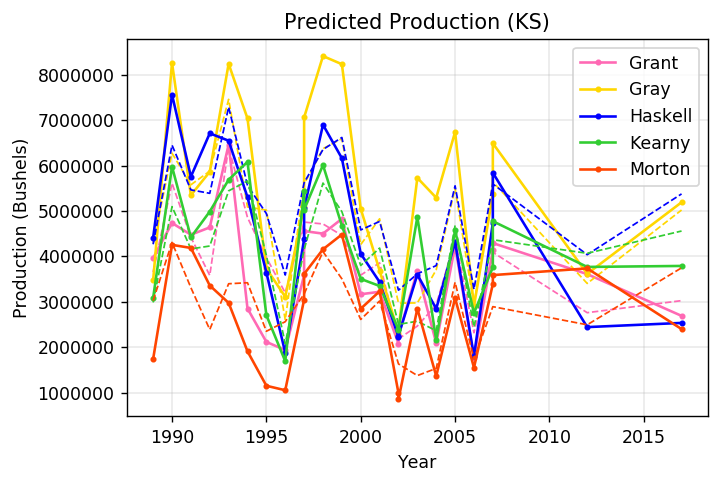

In [27]:
create_polynomial_regression_model_KS(2)

In [28]:
#create_polynomial_regression_model_KS(3)

#### Washington 

In [29]:
agri_climate_rearranged_WA = agri_climate_WA[['County Name', 'Year', 'Avg_Temp', 'Precipitation', 'PDSI', 'Bushels']]
agri_climate_rearranged_WA.rename(columns={'County Name':'County', 'Avg_Temp':'Average Temperature'}, inplace=True)
agri_climate_rearranged_WA['County'] = agri_climate_rearranged_WA['County'].map({'Lincoln': 1, 'Okanogan': 2, 'Skagit': 3, 'Spokane': 4, 'Whitman': 5})
agri_climate_rearranged_WA.head()

,County,Year,Average Temperature,Precipitation,PDSI,Bushels
0,1,1989,46.2,11.57,-1.426667,13935000
1,1,1990,47.8,12.89,1.212500,21663000
2,1,1991,47.2,12.52,0.696667,14899000
3,1,1992,48.7,11.46,-2.645833,18292000
4,1,1993,44.9,13.90,-0.713333,27194000


In [30]:
X = agri_climate_rearranged_WA[['County', 'Year', 'Average Temperature', 'Precipitation', 'PDSI']]
Y = agri_climate_rearranged_WA['Bushels']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

cdf = pd.DataFrame(lin_model.coef_.T, X.columns, columns=['coefficients'])
print(cdf)
#print('coefficients:', lin_model.coef_)
print('intercept:', lin_model.intercept_)
print("--------------------------------------")

print("Model performance for training set (WA)")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

print("--------------------------------------")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Model performance for testing set (WA)")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

                     coefficients
County              -4.855835e+05
Year                 8.607652e+04
Average Temperature  4.298592e+06
Precipitation       -2.094998e+05
PDSI                 1.517920e+06
intercept: -351188408.3318634
--------------------------------------
Model performance for training set (WA)
RMSE is 7084063.282988066
R2 score is 0.711611405254249
--------------------------------------
Model performance for testing set (WA)
RMSE is 8225997.32637861
R2 score is 0.5495003152753318


In [31]:
def create_polynomial_regression_model_WA(degree):
    "Creates a polynomial regression model for the given degree"
    poly_features = PolynomialFeatures(degree=degree)

    # transform the features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
    
    # Getting coefficients (polynomial regression)
    reg_label = "Inliers coef:%s - b:%0.2f" % \
                (np.array2string(poly_model.coef_, formatter={'float_kind': lambda fk: "%.3f" % fk}), poly_model.intercept_)
    print(reg_label)

    print("-------------------------------------------")
    print("Polynomial model performance for the training set (WA)")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("-------------------------------------------")
    print("Polynomial model performance for the test set (WA)")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
    # PLOTS
    # Lincoln
    X_Lincoln = X[X['County'] == 1]
    Y_Lincoln = agri_climate_rearranged_WA[['County', 'Bushels']]
    Y_Lincoln = Y_Lincoln[Y_Lincoln['County'] == 1]
    Y_Lincoln = Y_Lincoln.drop(['County'], axis=1)

    # Okanogan
    X_Okanogan = X[X['County'] == 2]
    Y_Okanogan = agri_climate_rearranged_WA[['County', 'Bushels']]
    Y_Okanogan = Y_Okanogan[Y_Okanogan['County'] == 2]
    Y_Okanogan = Y_Okanogan.drop(['County'], axis=1)

    # Skagit
    X_Skagit = X[X['County'] == 3]
    Y_Skagit = agri_climate_rearranged_WA[['County', 'Bushels']]
    Y_Skagit = Y_Skagit[Y_Skagit['County'] == 3]
    Y_Skagit = Y_Skagit.drop(['County'], axis=1)

    # Spokane
    X_Spokane = X[X['County'] == 4]
    Y_Spokane = agri_climate_rearranged_WA[['County', 'Bushels']]
    Y_Spokane = Y_Spokane[Y_Spokane['County'] == 4]
    Y_Spokane = Y_Spokane.drop(['County'], axis=1)

    # Whitman
    X_Whitman = X[X['County'] == 5]
    Y_Whitman = agri_climate_rearranged_WA[['County', 'Bushels']]
    Y_Whitman = Y_Whitman[Y_Whitman['County'] == 5]
    Y_Whitman = Y_Whitman.drop(['County'], axis=1)

    # Lincoln
    plt.plot(X_Lincoln['Year'], Y_Lincoln, linewidth=1.5, color='hotpink', marker='o', markersize=2.5, label='Lincoln')
    plt.plot(X_Lincoln['Year'], poly_model.predict(poly_features.fit_transform(X_Lincoln)), linewidth=1, linestyle='--', color='hotpink')

    # Okanogan
    plt.plot(X_Okanogan['Year'], Y_Okanogan, linewidth=1.5, color='gold', marker='o', markersize=2.5, label='Okanogan')
    plt.plot(X_Okanogan['Year'], poly_model.predict(poly_features.fit_transform(X_Okanogan)), linewidth=1, linestyle='--', color='gold')

    # Skagit
    plt.plot(X_Skagit['Year'], Y_Skagit, linewidth=1.5, color='blue', marker='o', markersize=2.5, label='Skagit')
    plt.plot(X_Skagit['Year'], poly_model.predict(poly_features.fit_transform(X_Skagit)), linewidth=1, linestyle='--', color='blue')

    # Spokane
    plt.plot(X_Spokane['Year'], Y_Spokane, linewidth=1.5, color='limegreen', marker='o', markersize=2.5, label='Spokane')
    plt.plot(X_Spokane['Year'], poly_model.predict(poly_features.fit_transform(X_Spokane)), linewidth=1, linestyle='--', color='limegreen')

    # Whitman
    plt.plot(X_Whitman['Year'], Y_Whitman, linewidth=1.5, color='orangered', marker='o', markersize=2.5, label='Whitman')
    plt.plot(X_Whitman['Year'], poly_model.predict(poly_features.fit_transform(X_Whitman)), linewidth=1, linestyle='--', color='orangered')

    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Production (Bushels)')
    plt.title('Predicted Production (WA)')
    plt.grid(linestyle='-', linewidth=0.25)
    plt.show()

Inliers coef:[0.000 -54926601.638 35408356.915 -45348407.502 554809.058 81395776.852
 8660228.356 8843.197 -276904.745 92744.303 -63729.601 -9075.567 22099.905
 -912.293 -42325.494 9841.458 29507.097 72415.196 -2568.402 2398.513
 101837.967] - b:-34421356747.51
-------------------------------------------
Polynomial model performance for the training set (WA)
RMSE of training set is 2423422.8953938624
R2 score of training set is 0.9662501668849458
-------------------------------------------
Polynomial model performance for the test set (WA)
RMSE of test set is 2501298.8895306317
R2 score of test set is 0.9583467834731139


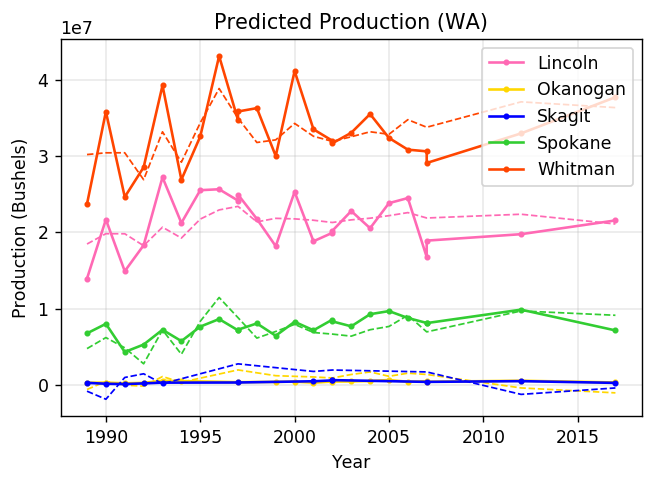

In [32]:
create_polynomial_regression_model_WA(2)

In [33]:
#create_polynomial_regression_model_WA(3)